In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
train_cats_dir = "/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/train/cats"
train_dogs_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/train/dogs'
validation_cats_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/validation/cats'
validation_dogs_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/validation/dogs'
test_cats_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/test/cats'
test_dogs_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/test/cats'
train_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/train'
validation_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/validation'
test_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/test'

In [63]:
import os

In [64]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
train_dogs_dir[1]

'c'

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100,epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
100/100 [==============================] - 431s 4s/step - loss: 0.6883 - accuracy: 0.5475 - val_loss: 0.6700 - val_accuracy: 0.5780
Epoch 2/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6607 - accuracy: 0.6085 - val_loss: 0.6501 - val_accuracy: 0.6230
Epoch 3/30
100/100 [==============================] - 18s 182ms/step - loss: 0.6282 - accuracy: 0.6545 - val_loss: 0.6489 - val_accuracy: 0.6110
Epoch 4/30
100/100 [==============================] - 18s 184ms/step - loss: 0.5775 - accuracy: 0.7110 - val_loss: 0.5848 - val_accuracy: 0.6960
Epoch 5/30
100/100 [==============================] - 18s 178ms/step - loss: 0.5312 - accuracy: 0.7220 - val_loss: 0.5776 - val_accuracy: 0.6860
Epoch 6/30
100/100 [==============================] - 19s 192ms/step - loss: 0.5083 - accuracy: 0.7540 - val_loss: 0.5913 - val_accuracy: 0.6800
Epoch 7/30
100/100 [==============================] - 18s 179ms/step - loss: 0.4699 - accuracy: 0.7705 - val_loss: 0.5503 - val_accu

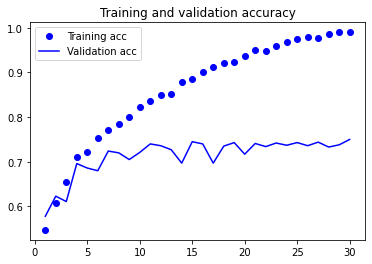

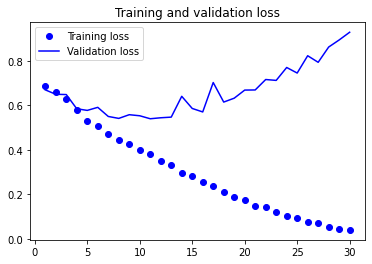

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
 datagen = ImageDataGenerator(
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2, 
     horizontal_flip=True, 
     fill_mode='nearest')

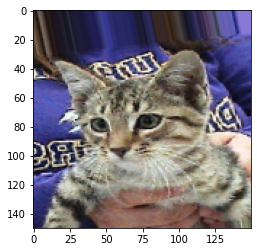

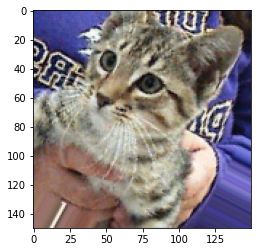

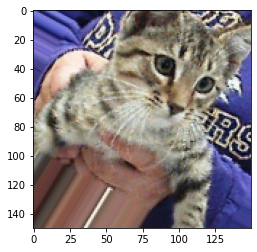

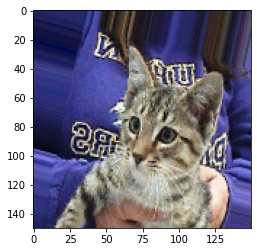

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

#Defining a new convnet that includes dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

#Training the convnet using data-augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=50,
validation_data=validation_generator,
validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
50/50 [==============================] - 25s 473ms/step - loss: 0.6945 - acc: 0.5145 - val_loss: 0.7357 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 24s 473ms/step - loss: 0.6926 - acc: 0.5278 - val_loss: 0.6806 - val_acc: 0.5427
Epoch 3/30
50/50 [==============================] - 24s 479ms/step - loss: 0.6852 - acc: 0.5375 - val_loss: 0.6695 - val_acc: 0.6031
Epoch 4/30
50/50 [==============================] - 24s 485ms/step - loss: 0.6770 - acc: 0.5719 - val_loss: 0.6565 - val_acc: 0.6073
Epoch 5/30
50/50 [==============================] - 24s 475ms/step - loss: 0.6676 - acc: 0.5732 - val_loss: 0.6484 - val_acc: 0.6229
Epoch 6/30
50/50 [==============================] - 24s 475ms/step - loss: 0.6589 - acc: 0.6029 - val_loss: 0.6382 - val_acc: 0.6302
Epoch 7/30
50/50 [==============================] - 24s 477ms/step - loss: 0.6460 - acc: 0.6112 - val_loss: 0.6217 - val_acc: 0.6490
Epoch 8/30
50/50 [==============================] - 23s 468ms/step - 

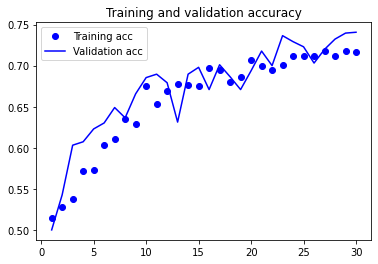

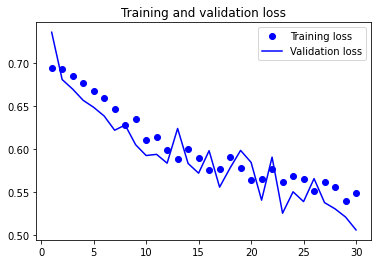

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 8s 245ms/step - loss: 0.5067 - acc: 0.7400
Test accuracy: 0.740


In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread("/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/test/cats/cat.1500.jpg")

In [87]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

model = tf.keras.models.load_model('/content/cats_and_dogs_small_PreTrained.h5')
c = 1


In [ ]:
for i in range(1500,1999):
  path = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/test/cats/cat.'+str(i)+'.jpg'
  # for imag in os.listdir(path):  # iterate over each image per dogs and cats


  # for imag in os.listdir(path):  # iterate over each image per dogs and cats

  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images)
  #print(c)
  if classes[0] > 0.5:
      print(str(i)," is dog")
  else:
      print(str(i)," is a cat")
  c += 1

In [103]:
img = plt.imread("/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content/test/cats/cat.1507.jpg")

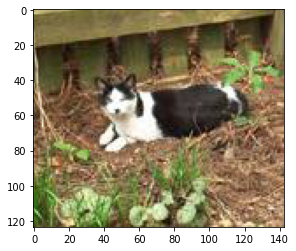

In [104]:
plt.imshow(img)

In [ ]:
classes[0]

array([0.77279913], dtype=float32)

#Pre-Trained Network

In [49]:
# from tensorflow import keras
import keras

In [50]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(150, 150, 3))

In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [72]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/content'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1

    if i * batch_size >= sample_count:
      break
  return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [74]:
test_features[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.50317109,
       0.        ])

In [78]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - acc: 0.5010 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - acc: 0.5000 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - acc: 0.5000 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - acc: 0.5000 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - acc: 0.5000 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - acc: 0.5000 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - acc: 0.5000 - val_loss: 0.0000e+00 - val_acc: 0.5000
Epoch 8/30
100/100 [

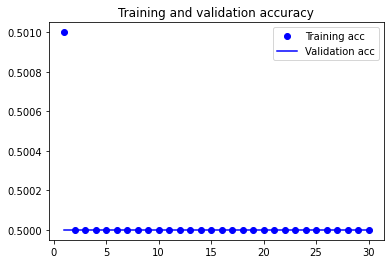

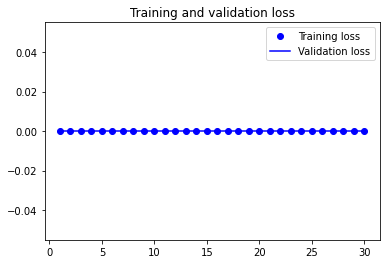

In [79]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [80]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [82]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [83]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 48s 431ms/step - loss: 0.5349 - acc: 0.7110 - val_loss: 0.2487 - val_acc: 0.9100
Epoch 2/30
100/100 [==============================] - 43s 425ms/step - loss: 0.3092 - acc: 0.8685 - val_loss: 0.2559 - val_acc: 0.8990
Epoch 3/30
100/100 [==============================] - 43s 428ms/step - loss: 0.2410 - acc: 0.8975 - val_loss: 0.1239 - val_acc: 0.9500
Epoch 4/30
100/100 [==============================] - 43s 428ms/step - loss: 0.1978 - acc: 0.9160 - val_loss: 0.3260 - val_acc: 0.8890
Epoch 5/30
100/100 [==============================] - 43s 425ms/step - loss: 0.1574 - acc: 0.9365 - val_loss: 0.1231 - val_acc: 0.9580
Epoch 6/30
100/100 [==============================] - 43s 424ms/step - loss: 0.1411 - acc: 0.9430 - val_loss: 0.1030 - val_acc: 0.9630
Epoch 7/30
100/100 [==============================] - 43s 425ms/step - loss: 0.1122 - acc: 0.9570 - val_loss: 0.1475 - val_acc: 0.9390
Epoch 8/30
100/100 [==============================] - 4

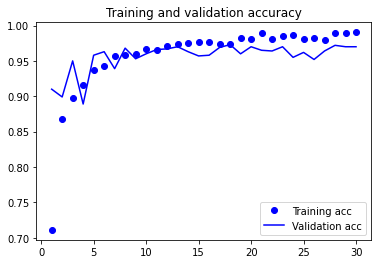

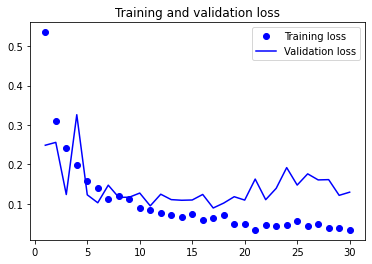

In [84]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc:.3f}")

50/50 [==============================] - 7s 138ms/step - loss: 0.1298 - acc: 0.9700
Test accuracy: 0.970


In [86]:
model.save('cats_and_dogs_small_PreTrained.h5')